<a href="https://colab.research.google.com/github/daniel1pontes/Workshop-Dados-25.2/blob/main/desafioMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
df = pd.read_csv("/content/pcos_dataset.csv")
df

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0
...,...,...,...,...,...,...
995,34,18.4,1,95.7,23,0
996,45,28.9,1,28.5,7,0
997,37,28.3,0,32.4,28,0
998,41,27.3,0,95.6,9,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


Bmi = Body mass index

In [30]:
x_data = df.iloc[:, 0:5].values
y_data = df.iloc[:, 5].values

x_data, y_data

(array([[24. , 34.7,  1. , 25.2, 20. ],
        [37. , 26.4,  0. , 57.1, 25. ],
        [32. , 23.6,  0. , 92.7, 28. ],
        ...,
        [37. , 28.3,  0. , 32.4, 28. ],
        [41. , 27.3,  0. , 95.6,  9. ],
        [22. , 21.9,  1. , 78.9,  7. ]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
     

In [40]:
encoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1])], remainder='passthrough')

In [41]:
x_data = encoder.fit_transform(x_data)
x_data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4530 stored elements and shape (1000, 174)>

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 174), (200, 174), (800,), (200,))

In [45]:
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
modelNB = GaussianNB()
modelNB.fit(x_train.toarray(), y_train)

GaussianNB()

In [48]:
modelTree = DecisionTreeClassifier()
modelTree.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
modelRF = RandomForestClassifier()
modelRF.fit(x_train, y_train)

RandomForestClassifier()

In [51]:
def PerformanceMetrics(y_true, predict, class_name):

    # Imprime Matriz de Confusão:
    confusion_matrix_df = pd.DataFrame(
        confusion_matrix(y_true, predict),
        index=class_name,
        columns=class_name
    )

    plt.figure(figsize=(5,3))
    sn.set_theme(font_scale=0.9)
    sn.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)


    # Imprime a Acurácia:
    print(f"A acurácia geral do modelo em relação a todos os dados foi de aproximadamente {accuracy_score(y_true, predict) * 100:.2f}%.")
    for i, label in enumerate(class_name):
        print(f"O modelo identificou corretamente {confusion_matrix_df.values[i][i]} registros com o rótulo '{label}'.")

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 86.50%.
O modelo identificou corretamente 152 registros com o rótulo 'PCO positivo'.
O modelo identificou corretamente 21 registros com o rótulo 'PCO negativo'.


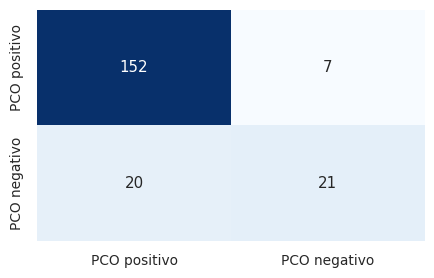

In [54]:
predictLogistic = modelLogistic.predict(x_test)

PerformanceMetrics(y_test, predictLogistic, ['PCO positivo', 'PCO negativo'])

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 86.00%.
O modelo identificou corretamente 139 registros com o rótulo 'PCO positivo'.
O modelo identificou corretamente 33 registros com o rótulo 'PCO negativo'.


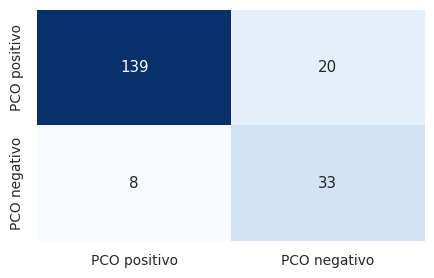

In [57]:
predictNB = modelNB.predict(x_test.toarray())

PerformanceMetrics(y_test, predictNB, ['PCO positivo', 'PCO negativo'])

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 86.50%.
O modelo identificou corretamente 141 registros com o rótulo 'PCO positivo'.
O modelo identificou corretamente 32 registros com o rótulo 'PCO negativo'.


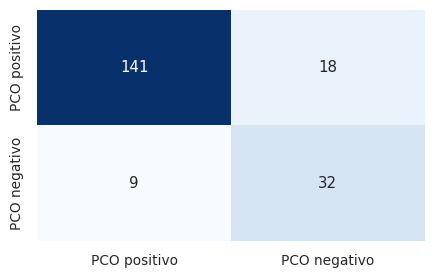

In [58]:
predictTree= modelTree.predict(x_test)

PerformanceMetrics(y_test, predictTree, ['PCO positivo', 'PCO negativo'])

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 91.00%.
O modelo identificou corretamente 150 registros com o rótulo 'PCO positivo'.
O modelo identificou corretamente 32 registros com o rótulo 'PCO negativo'.


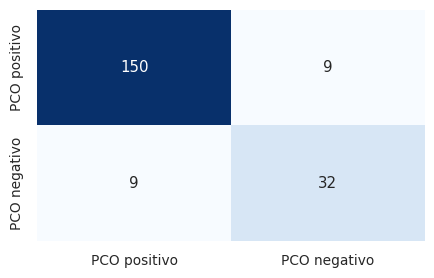

In [59]:
predictRF = modelRF.predict(x_test)

PerformanceMetrics(y_test, predictRF, ['PCO positivo', 'PCO negativo'])

In [62]:
import joblib

joblib.dump(modelRF, "modelRF.pkl")
joblib.dump(preprocessor, "preprocessor.pkl")

['preprocessor.pkl']